# HomeWork 2

# Matthew Anderson | 801203905

# Github https://github.com/Mand187/Intro-to-ML


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
## CSV/Data Processing ##

url = "https://raw.githubusercontent.com/Mand187/Intro-to-ML/master/Data/Housing.csv"
hf = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print(hf.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [ ]:
def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

def modelTrain(inputs, df_training, df_validation, y_train, y_valid, learning_rate, iterations):
    training_inputs = df_training[inputs]
    x_train = np.c_[np.ones((len(training_inputs), 1)), training_inputs]

    validation_inputs = df_validation[inputs]
    x_valid = np.c_[np.ones((len(validation_inputs), 1)), validation_inputs]

    n = x_train.shape[1]
    m_train = len(x_train)
    m_valid = len(x_valid)
    theta = np.zeros(n)

    train_losses = []
    valid_losses = []

    for i in range(iterations):
        h_theta = x_train.dot(theta)
        error = np.subtract(h_theta, y_train)
        gradient = (1 / m_train) * (x_train.transpose().dot(error))

        theta -= (learning_rate * gradient)

        train_loss = 1 / (2 * m_train) * np.sum(np.square((h_theta - y_train)))
        valid_loss = 1 / (2 * m_valid) * np.sum(np.square((x_valid.dot(theta) - y_valid)))

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

    return train_losses, valid_losses

In [ ]:
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

hf[variable_list] = hf[variable_list].apply(binary_mapping)

np.random.seed(0)
df_training, df_validation = train_test_split(hf, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = df_training.pop('price')
y_valid = df_validation.pop('price')

inputs = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
learning_rate = 0.01
iterations = 50

trainLoss1A, validLoss1A = modelTrain(inputs, df_training, df_validation, y_train, y_valid, learning_rate, iterations)

inputs2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
inputs2 = df_training.columns.tolist()[:-1]

trainLoss1B, validLoss1B = modelTrain(inputs2, df_training, df_validation, y_train, y_valid, learning_rate, iterations)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


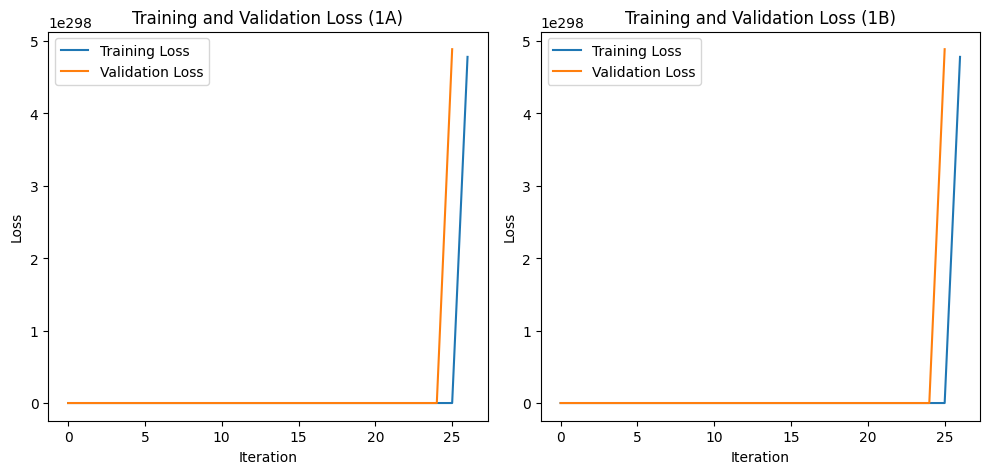

In [ ]:
# Create the plot figure and layout
plt.figure(figsize=(10, 5))

# First subplot for trainLoss1A and validLoss1A
plt.subplot(1, 2, 1)
plt.plot(trainLoss1A, label="Training Loss")
plt.plot(validLoss1A, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss (1A)")

# Second subplot for trainLoss1B and validLoss1B
plt.subplot(1, 2, 2)
plt.plot(trainLoss1B, label="Training Loss")
plt.plot(validLoss1B, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss (1B)")

# Adjust the layout
plt.tight_layout()
plt.show()